In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
data = pd.read_csv(r"C:\Users\rosha\Downloads\Amazon Sales data (1).csv")

In [53]:
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [54]:
data.tail()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
95,Sub-Saharan Africa,Mali,Clothes,Online,M,7/26/2011,512878119,9/3/2011,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,11/11/2011,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,6/1/2016,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,7/30/2015,559427106,8/8/2015,5767,81.73,56.67,471336.91,326815.89,144521.02
99,Sub-Saharan Africa,Mozambique,Household,Offline,L,2/10/2012,665095412,2/15/2012,5367,668.27,502.54,3586605.09,2697132.18,889472.91


In [55]:
missing_values=data.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64


In [56]:
data["Order Date"] =pd.to_datetime(data["Order Date"])

In [57]:
data["Year"]= data["Order Date"].dt.year
data["Month"]= data["Order Date"].dt.month
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Year,Month
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,5
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36,2012,8
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014,5
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82,2014,6
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013,2


In [58]:
regions = data["Region"].nunique()

In [59]:
print("Number of Regions:",regions)

Number of Regions: 7


In [60]:
country= data["Country"].nunique()
print("Number of Countries:", country)

Number of Countries: 76


In [61]:
item_type=data["Item Type"].nunique()
print("Number of Item Types:" , item_type)

Number of Item Types: 12


In [62]:
unit_sold=data["Units Sold"].sum()
print("Total Unit Sold:", unit_sold)

Total Unit Sold: 512871


In [63]:
unit_cost=data["Unit Cost"].sum()
print("Total Unit Cost:", unit_cost)

Total Unit Cost: 19104.8


In [64]:
total_revenue=data["Total Revenue"].sum()
print("Total Revenue:",total_revenue )

Total Revenue: 137348768.31


In [65]:
total_cost=data["Total Cost"].sum()
print("Total Cost:",total_cost)

Total Cost: 93180569.91000001


In [66]:
total_profit= data["Total Profit"].sum()
print("Total Profit:", total_profit)

Total Profit: 44168198.39999999


In [67]:
data.groupby(['Region','Sales Channel'])['Total Profit'].sum()

Region                             Sales Channel
Asia                               Offline          3584286.33
                                   Online           2529559.54
Australia and Oceania              Offline          1886283.82
                                   Online           2835876.21
Central America and the Caribbean  Offline          2475814.99
                                   Online            371092.86
Europe                             Offline          5574539.91
                                   Online           5508398.72
Middle East and North Africa       Offline          2169081.08
                                   Online           3592110.78
North America                      Offline          1457942.76
Sub-Saharan Africa                 Offline          7772777.78
                                   Online           4410433.62
Name: Total Profit, dtype: float64

Text(0, 0.5, 'Total Revenue')

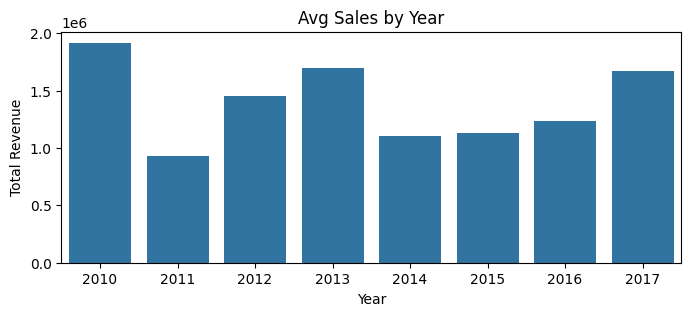

In [68]:
year_sales = data.groupby('Year')['Total Revenue'].mean()
plt.figure(figsize=(8,3))
sns.barplot(x=year_sales.index, y=year_sales.values,)
plt.title('Avg Sales by Year')
plt.xlabel('Year')
plt.ylabel('Total Revenue')

Text(0.5, 1.0, 'Avg profit in region wise')

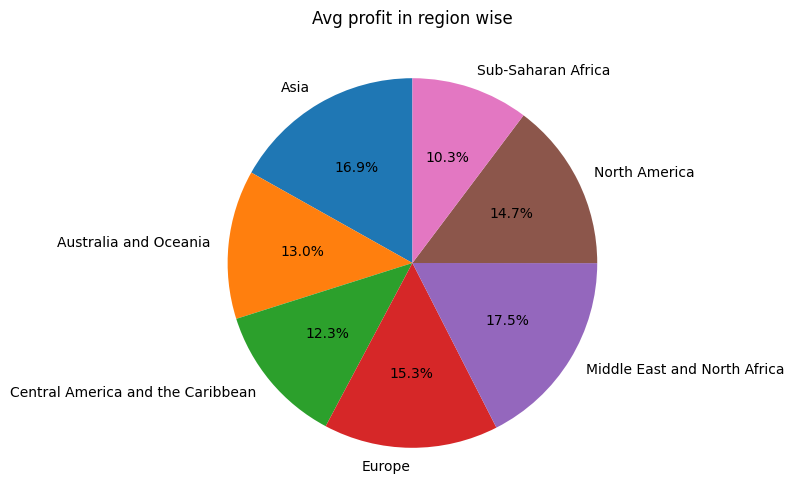

In [69]:
plt.figure(figsize=(6,6))
region_TotalRevenue= data.groupby('Region')['Total Profit'].mean()
plt.pie(region_TotalRevenue,startangle=90, labels= region_TotalRevenue.index, autopct='%1.1f%%')
plt.title('Avg profit in region wise')

In [70]:
TotalRevenue_ItemType= data.groupby('Item Type')['Total Revenue'].sum()

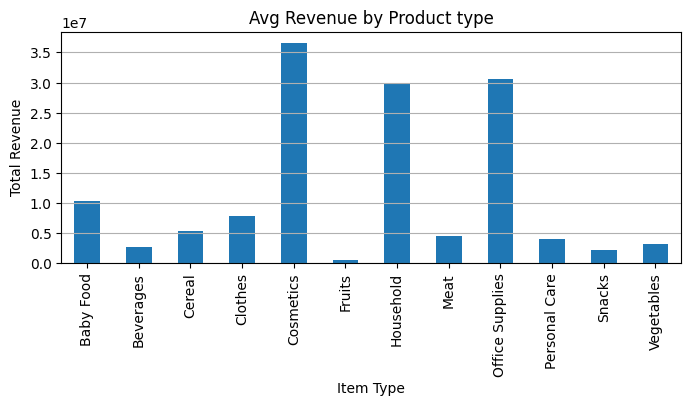

In [71]:
plt.figure(figsize=(8,3))
TotalRevenue_ItemType.plot(kind='bar')
plt.xlabel('Item Type')
plt.ylabel('Total Revenue')
plt.title('Avg Revenue by Product type')
plt.grid(axis='y')

In [72]:
TotalRevenue_SalesChannel= data.groupby('Sales Channel')['Total Revenue'].sum()

Text(0.5, 1.0, 'Total Revenue by Sales Channel')

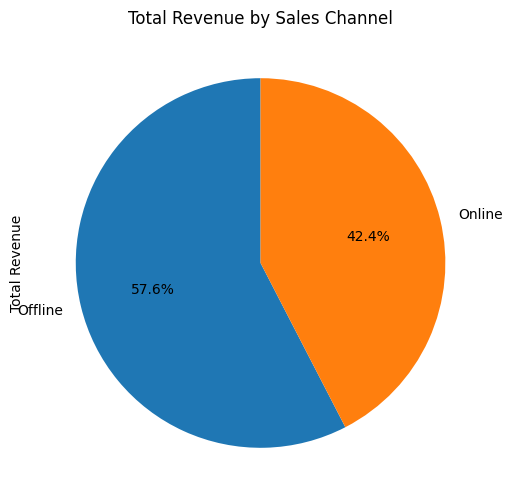

In [73]:
plt.figure(figsize=(6,6))
plt.tight_layout()
TotalRevenue_SalesChannel.plot(kind='pie',autopct='%1.1f%%',startangle=90)
plt.title('Total Revenue by Sales Channel')

(-1.0999999530116766,
 1.0999990132545814,
 -1.0999995737000883,
 1.0999999797000042)

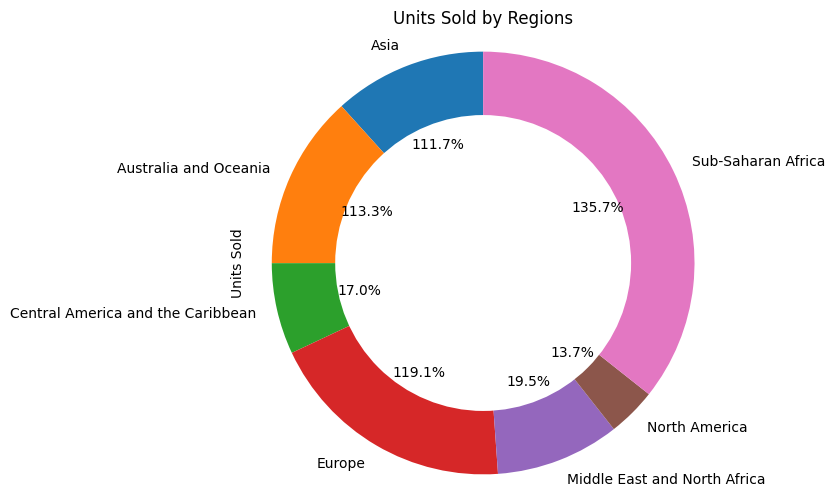

In [74]:
Region_UnitSold= data.groupby('Region')['Units Sold'].sum()
plt.figure(figsize=(6,6))
Region_UnitSold.plot(kind='pie', labels=Region_UnitSold.index, autopct='1%.1f%%', startangle=90)

#Draw a circle at the center of the pie chart
center_circle= plt.Circle((0,0),(0.70), fc='white')
fig= plt.gcf()
fig.gca().add_artist(center_circle)

#Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Units Sold by Regions')
plt.axis('equal')

In [46]:
YearMonth_UnitsSold= data.groupby(['Year','Month'])['Units Sold'].sum()

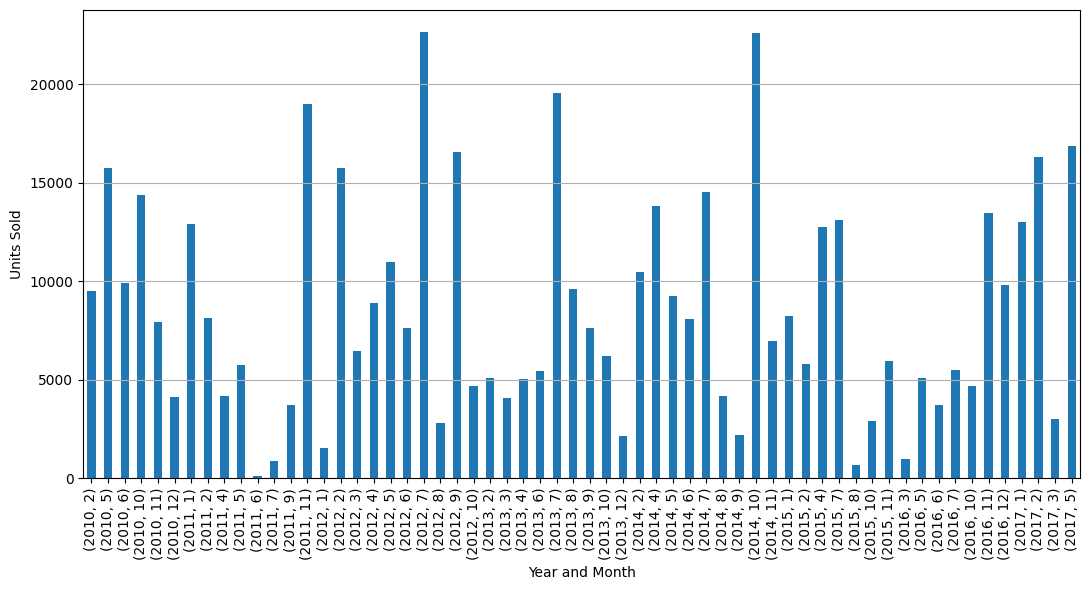

In [49]:
plt.figure(figsize=(11,6))
YearMonth_UnitsSold.plot(kind='bar')
plt.xlabel('Year and Month')
plt.ylabel('Units Sold')
plt.tight_layout()
plt.grid(axis='y')

In [50]:
TotalCost_SalesChannel= data.groupby('Sales Channel')['Total Cost'].sum()

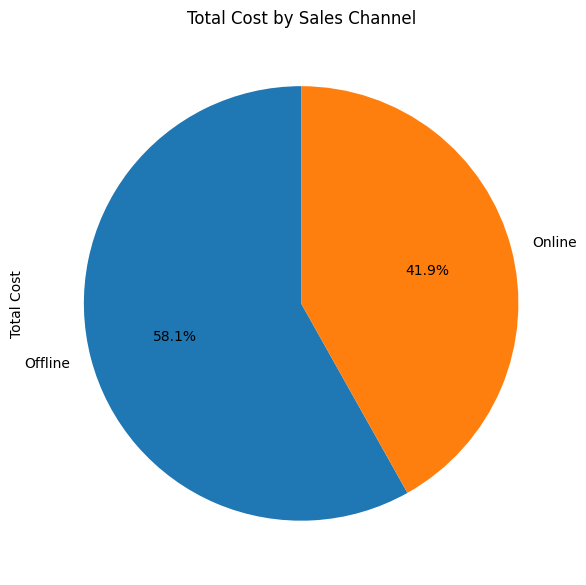

In [51]:
plt.figure(figsize=(6,6))
TotalCost_SalesChannel.plot(kind='pie', autopct="%1.1f%%", startangle=90)
plt.title("Total Cost by Sales Channel")
plt.tight_layout()